# Filippo Conforto - RLab01

In order to work with data, some libraries are needed.

In [1]:
library(tidyverse)
library(repr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## Exercise 1

Starting from the data given by Wikipedia, the main properties for each lake are stored by using a serie of vectors.

In [2]:
l_name = c("Loch Ness", "Loch Lomond", "Loch Morar", "Loch Tay","Loch Awe",
           "Loch Maree","Loch Ericht", "Loch Lochy","Loch Rannoch","Loch Shiel",
           "Loch Katrine","Loch Arkaig" ,"Loch Shin")
vol = c(7.45,2.6,2.3,1.6,1.2,1.09,1.08,1.07,0.97,0.79,0.77,0.75,0.35)

area = c(56.0,71.0,27.0,26.4,39.0,28.6,18.6,16.0,19.0,19.5,12.4,16.0,22.5)
len = c(39.0,36.0,18.8,23.0,41.0,20.0,23.0,16.0,15.7,28.0,12.9,19.3,27.8)
max_d = c(230,190,310,150,94,114,156,162,134,128,151,109,49)
mean_d = c( 132.0,37.0,87.0,60.6,32.0,38.0,57.6,70.0,51.0,40.0,43.4,46.5,15.5)

Using these vector a dataframe can be created with `data.frame()` function.

In [3]:
lakes = data.frame(Loch = l_name, Volume = vol, Area = area, Length = len, Max_Depth = max_d, Mean_Depth = mean_d)

Lake with highest or lowest value of area or volume can be found using `order()` function.

In [4]:
message("The lake with largest volume is ",lakes[order(lakes$Volume, decreasing = TRUE),][1,]$Loch)
message("The lake with smallest volume is ",lakes[order(lakes$Volume),][1,]$Loch)
message("The lake with largest area is ",lakes[order(lakes$Area, decreasing = TRUE),][1,]$Loch)
message("The lake with smallest area is ",lakes[order(lakes$Area),][1,]$Loch)

The lake with largest volume is Loch Ness

The lake with smallest volume is Loch Shin

The lake with largest area is Loch Lomond

The lake with smallest area is Loch Katrine



With the same function, `order()`, a dataframe can be produced.

In [5]:
lakes[order(lakes$Area, decreasing = TRUE),]

,Loch,Volume,Area,Length,Max_Depth,Mean_Depth
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Loch Lomond,2.60,71.0,36.0,190,37.0
1,Loch Ness,7.45,56.0,39.0,230,132.0
5,Loch Awe,1.20,39.0,41.0,94,32.0
6,Loch Maree,1.09,28.6,20.0,114,38.0
3,Loch Morar,2.30,27.0,18.8,310,87.0
4,Loch Tay,1.60,26.4,23.0,150,60.6
13,Loch Shin,0.35,22.5,27.8,49,15.5
10,Loch Shiel,0.79,19.5,28.0,128,40.0
9,Loch Rannoch,0.97,19.0,15.7,134,51.0


In [6]:
message("The two lakes with largest area are ",lakes[order(lakes$Area, decreasing = TRUE),][1,]$Loch, " and ",lakes[order(lakes$Area, decreasing = TRUE),][2,]$Loch)

The two lakes with largest area are Loch Lomond and Loch Ness



In [52]:
message("The sum of lakes' area is ",sum(lakes$Area)," km^2")

The sum of lakes' area is 372 km^2



## Exercise 2


Data can be imported from the original source using `read.table()`.

In [7]:
oildata = read.table("DATA/crude-oil-prices.csv", sep = ",", header = T)

The oil price variation trough the years can be shown using `plot()` function,

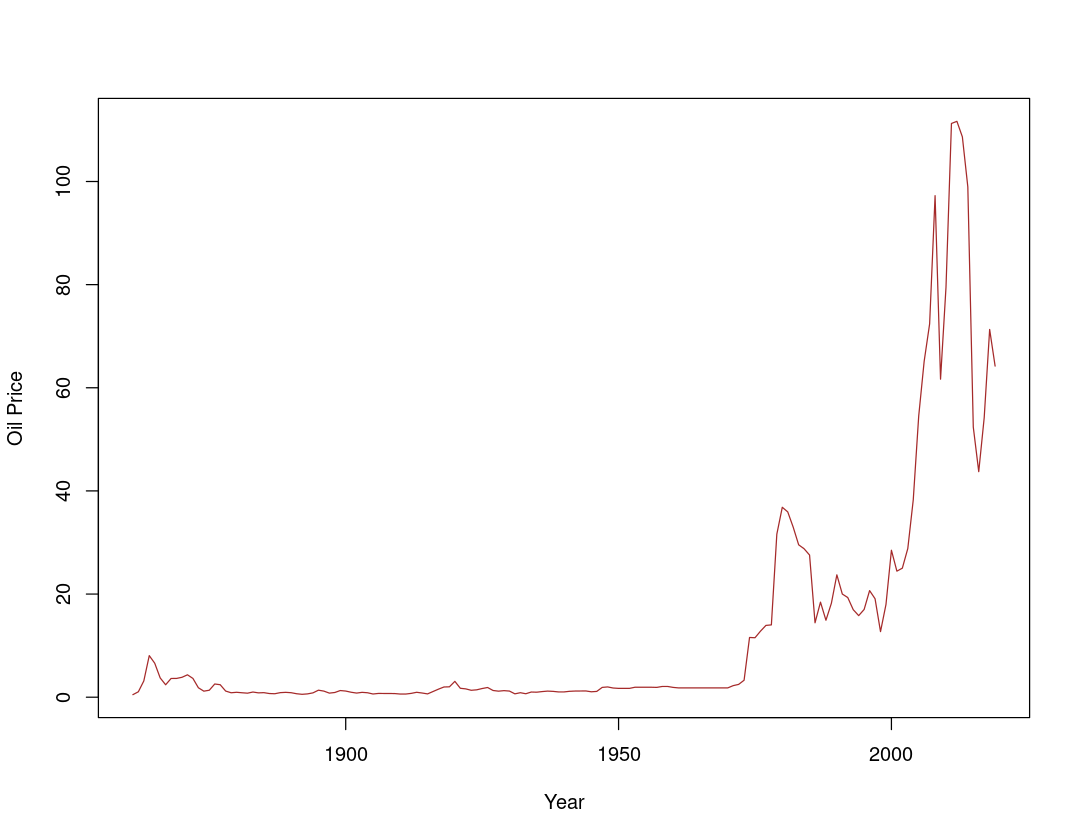

In [8]:
options(repr.plot.width=9, repr.plot.height=7)
plot(oildata$Year, oildata$Oil, t="l", xlab = "Year", ylab = "Oil Price", col = "brown")

In [9]:
message("The highest oil price in history is ", format(oildata[order(oildata$OilPrice, decreasing = T),][1,]$OilPrice, digits = 5))
message("The highest oil price occurence has been in ",oildata[order(oildata$OilPrice, decreasing = T),][1,]$Year)

The highest oil price in history is 111.67

The highest oil price occurence has been in 2012



The discrete derivative of the oil price curve is obtained using appropriate slicing, and plotted using the `plot()` function.

In [10]:
deriv = oildata[2:nrow(oildata),]$OilPrice - oildata[1:nrow(oildata)-1,]$OilPrice

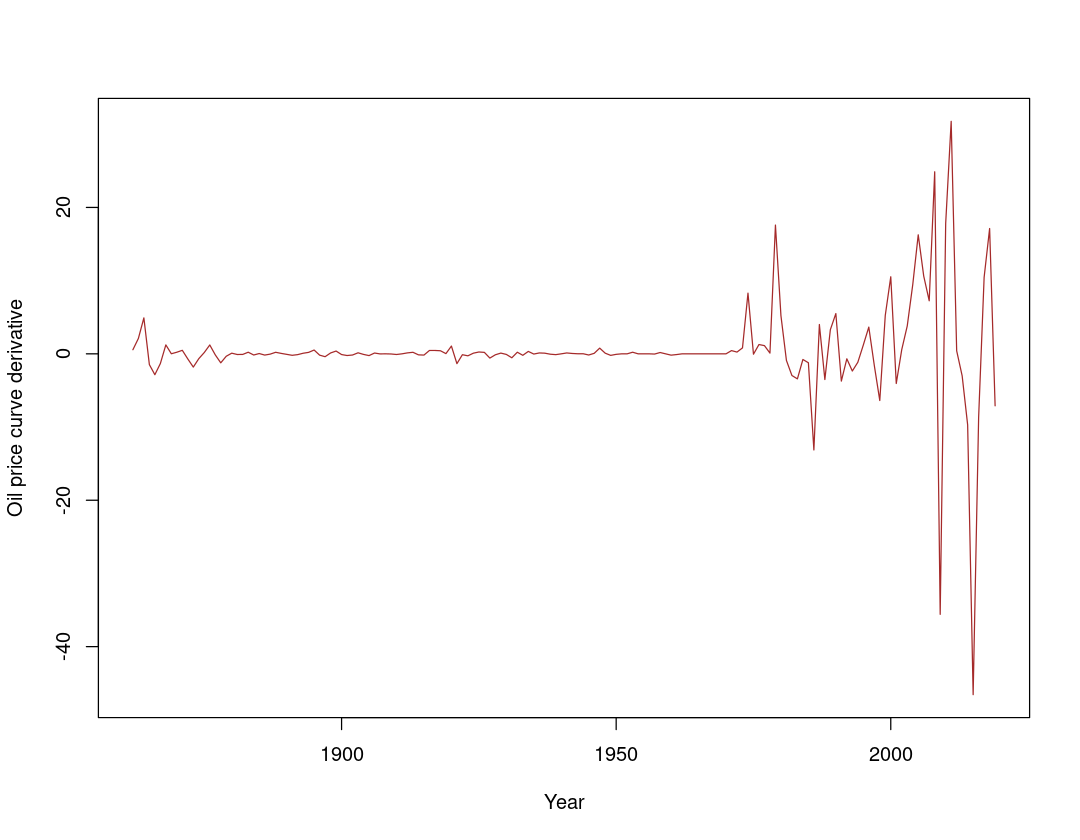

In [11]:
options(repr.plot.width=9, repr.plot.height=7)
plot(oildata$Year[-1], deriv, t="l", xlab = "Year", ylab = "Oil price curve derivative", col = "brown")

## Exercise 3

The dataframe is loaded using again `read_csv` and transformed into a tibble using `tibble()` function.

In [19]:
coaldata = tibble(read_csv("DATA/coal-production-by-country.csv")) 


── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
cols(
  Entity = col_character(),
  Code = col_character(),
  Year = col_double(),
  `Coal production (TWh)` = col_double()
)




Entities not representing a state are removed from the dataframe in order to accurately represent data.

In [20]:
not_cnt = c("Europe","EU-28", "CIS", "Eurasia", "Europe (other)", 'Asia Pacific','Asia and Oceania', 'North America', 'Central and South America', 'OECD','OPEC','Other Africa','Other Asia & Pacific', 'Other CIS','Other S. & Cent. America', 'USSR', "World")
coaldata = subset(coaldata,!(Entity %in% not_cnt))
un_cnt = unique(coaldata$Entity)

This dataframe contains data from a list of countries, obtained using `unique()`. From this list the count is obtained using `length()`

In [21]:
message("The number of countries available in the file is ", length(un_cnt))

The number of countries available in the file is 183



The count of entries for each country is given by the function `table()`, that associates each country with the number of times it appears on the list.

In [22]:
counts = table(coaldata$Entity)

Finally the barplot is obtained using the counts object, that contains each country and his counts.

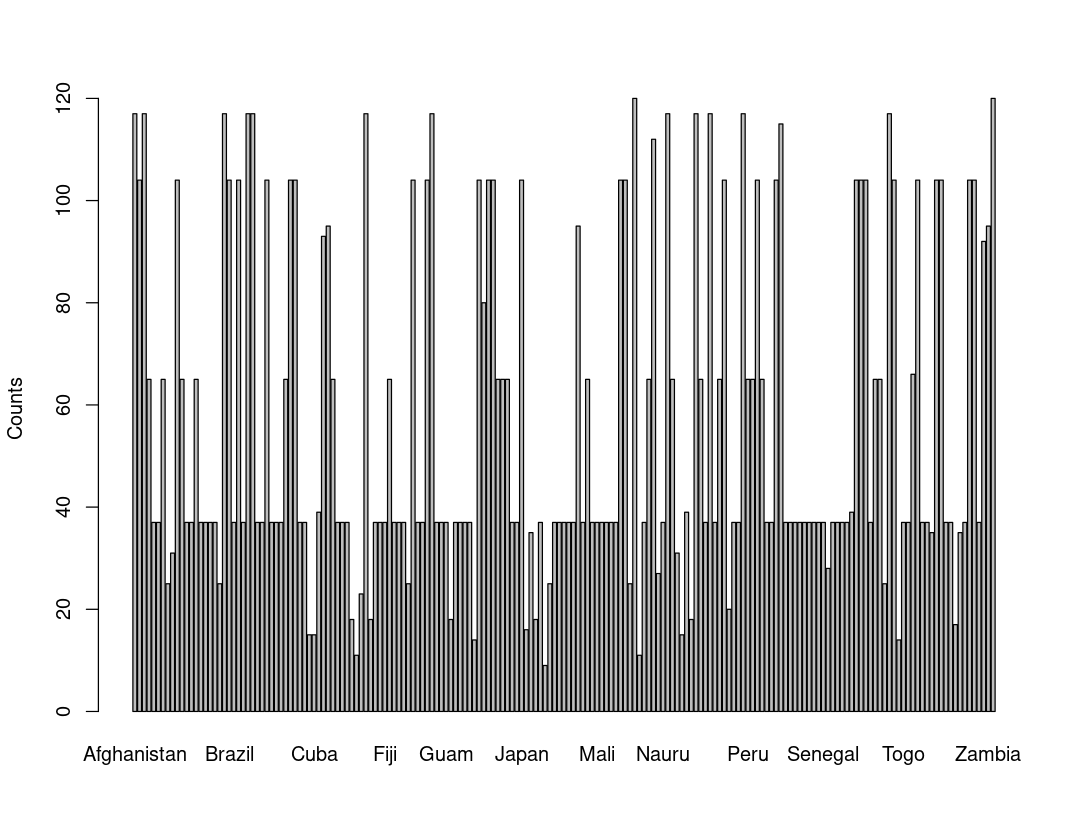

In [23]:
options(repr.plot.width=9, repr.plot.height=7)
barplot(counts, names.arg = dimnames(counts)[[1]], ylab = "Counts")

For the next steps is useful to save a subset of the original dataframe, containing only data for years following the 1970.

In [24]:
coaldata70 = coaldata[coaldata$Year > 1970,]

`aggregate()` function is used to get the sum of coal production for each country.

In [25]:
agg_coal = aggregate(coaldata70[4], by= list(coaldata70$Entity), FUN = sum)

In [26]:
for (i in 1:5){
    message("The ", i, "° country for coal production is ", agg_coal[order(agg_coal$C, decreasing = TRUE),][i,]$Group.1, " and has a total production of ", agg_coal[order(agg_coal$C, decreasing = TRUE),][i,]$Coal, " TWh")
}


The 1° country for coal production is China and has a total production of 459564.647 TWh

The 2° country for coal production is United States and has a total production of 226068.837 TWh

The 3° country for coal production is Russia and has a total production of 98251.646 TWh

The 4° country for coal production is Australia and has a total production of 83077.065 TWh

The 5° country for coal production is India and has a total production of 77043.453 TWh



Is useful also to save these countries and their coal production in order to plot their history. This time ggplot is used, since it allows to group easily the countries' data.

In [28]:
top_cnt = agg_coal[order(agg_coal$C, decreasing = TRUE),][1:5,]$Group.1

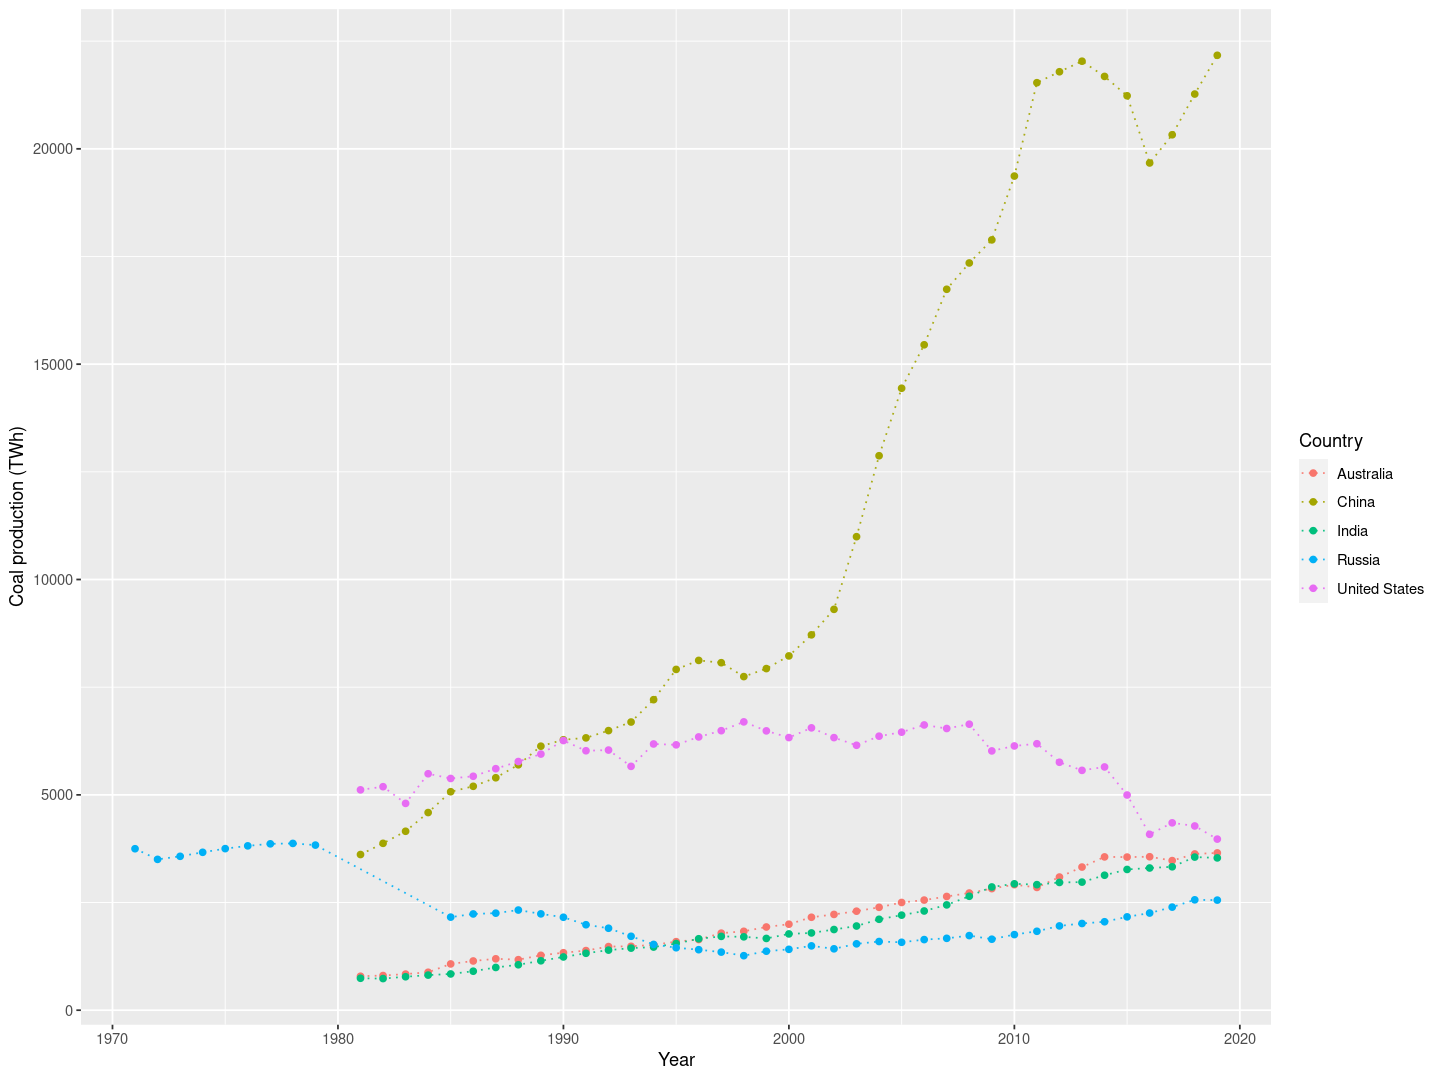

In [44]:
options(repr.plot.width=12, repr.plot.height=9)
ggplot ( subset(coaldata70,Entity %in% top_cnt)) + 
    aes ( x = Year, y = `Coal production (TWh)`,colour = Entity) + 
    geom_line(linetype = "dotted", alpha = 0.9) +
    geom_point( shape = 19) +
    labs(colour = "Country")

Using an aggregate and `ggplot()` the total coal production can be shown 

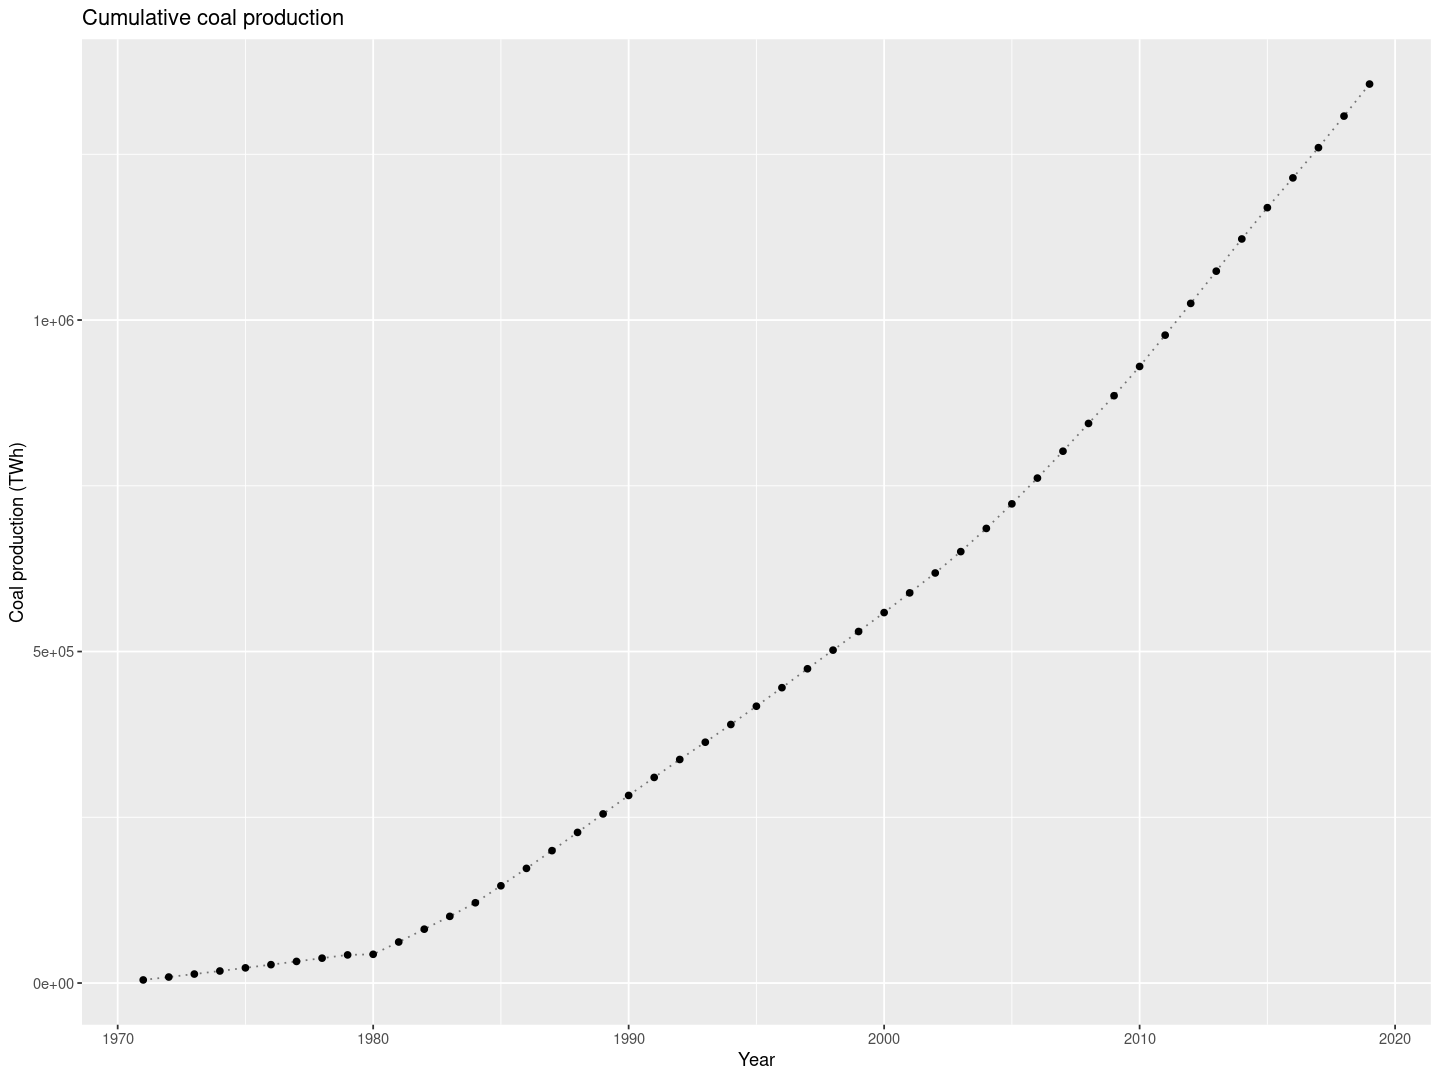

In [42]:
options(repr.plot.width=12, repr.plot.height=9)
ggplot ( aggregate(coaldata70$`Coal production (TWh)`, by= list(coaldata70$Year), FUN = sum)) + 
    aes ( x = Group.1, y = cumsum(x)) + 
    geom_line(linetype = "dotted", alpha = 0.5) +
    geom_point( shape = 19) +
    labs(x="Year", y = "Coal production (TWh)", title = "Cumulative coal production")

## Exercise 4

In [16]:
data_covid = tibble(read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations-by-manufacturer.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  date = col_date(format = ""),
  vaccine = col_character(),
  total_vaccinations = col_double()
)




### Italy

These cells are similar for all the countries discussed here and are used to store and plot data regarding the selected country.

In [17]:
data_ita = filter(data_covid, location == "Italy")

From this dataframe is possible, using ggplot, to get the desired graph.

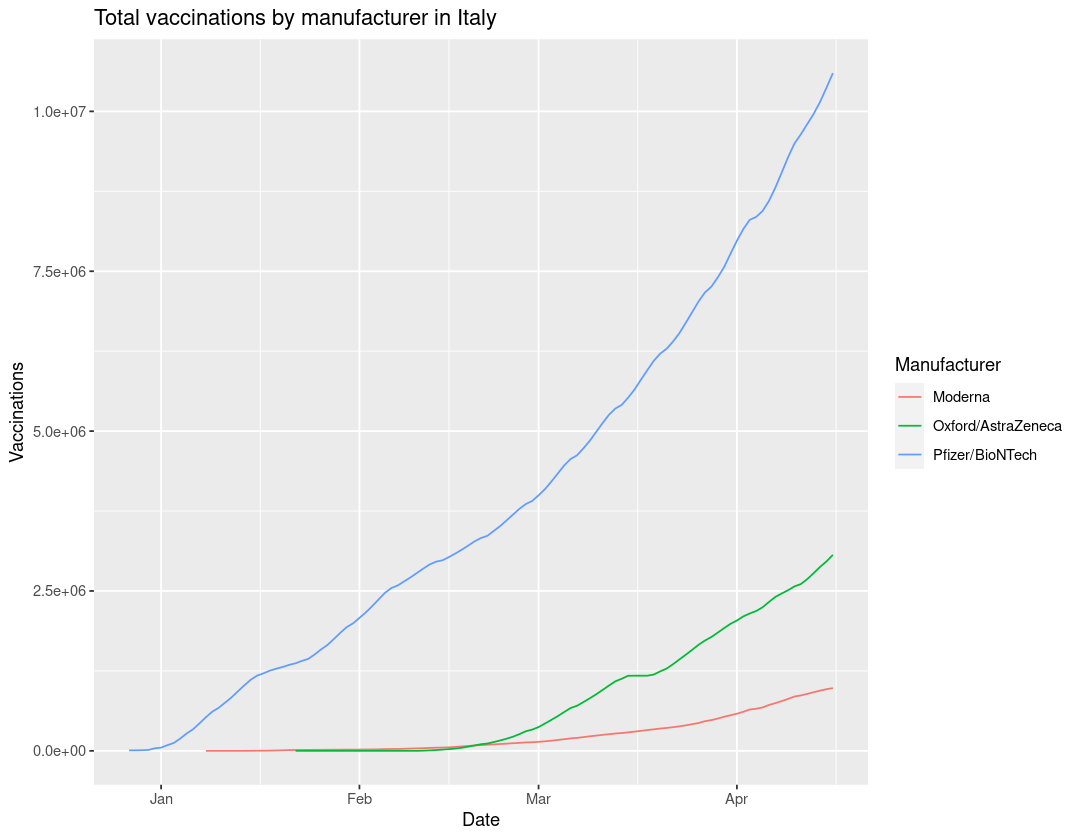

In [54]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_ita, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) +
    geom_line() +
    labs( x ="Date", y="Vaccinations", title="Total vaccinations by manufacturer in Italy", color = "Manufacturer")

The total number of vaccinations is obtained with an aggregate, while `mutate()` is used in order to compute also the number of vaccinations per day and insert it in the dataframe.

In [47]:
data_agg_ita = aggregate(data_ita$total_vaccinations, by= list(data_ita$date), FUN = sum)
data_agg_ita = mutate(data_agg_ita, daily=c(NA,data_agg_ita$x[2:length(data_agg_ita$x)]-data_agg_ita$x[1:length(data_agg_ita$x)-1]))

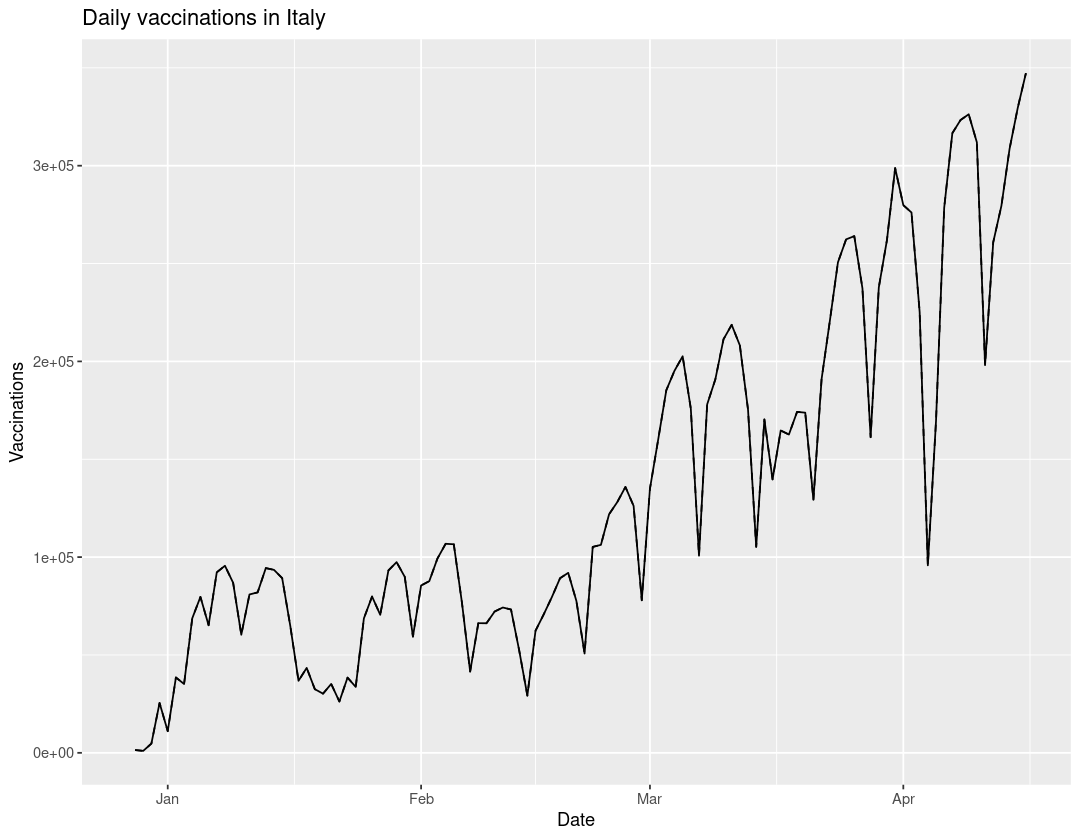

In [56]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg_ita, aes ( x = Group.1, y = daily)) + geom_line(na.rm=TRUE) +
    labs(x="Date",y="Vaccinations", title = "Daily vaccinations in Italy") +
    geom_line(linetype = "dashed", na.rm=TRUE) 

Using these techniques the analysis can be repeated over a number of different countries.

### Germany

In [57]:
data_ger = filter(data_covid, location == "Germany")

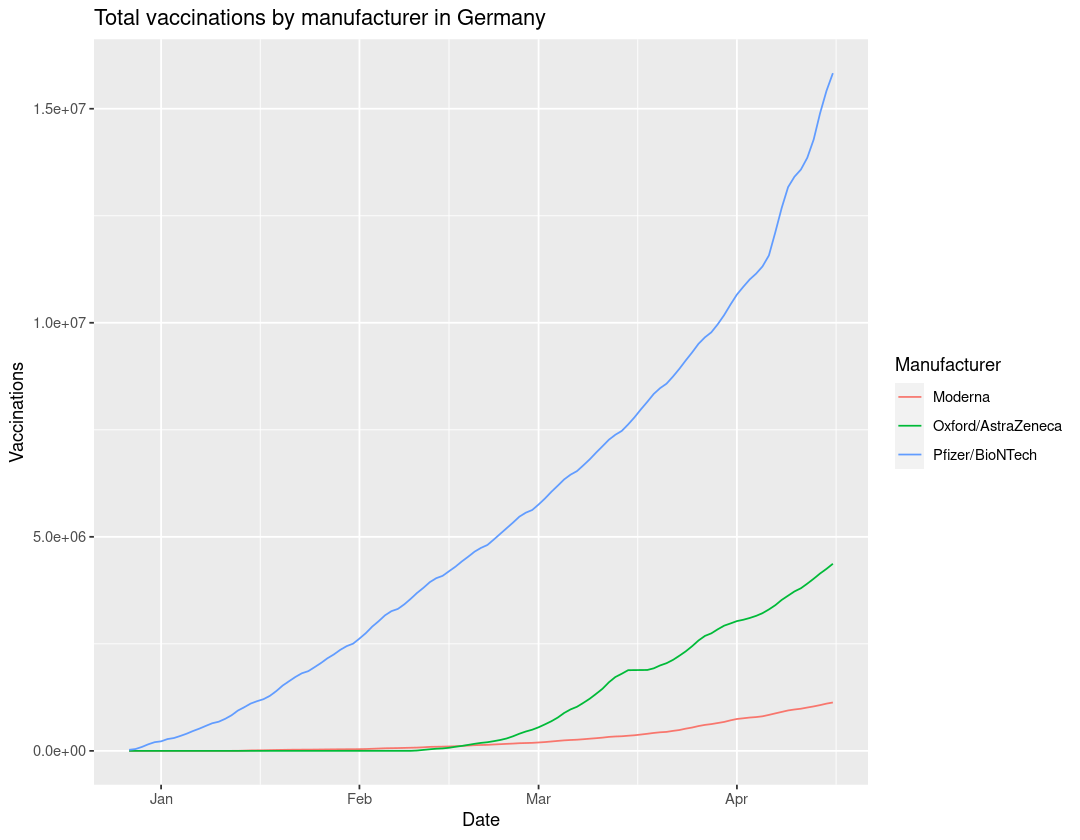

In [58]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_ger, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) +
    geom_line() +
    labs( x ="Date", y="Vaccinations", title="Total vaccinations by manufacturer in Germany", color = "Manufacturer")

In [61]:
data_agg_ger = aggregate(data_ger$total_vaccinations, by= list(data_ger$date), FUN = sum)
data_agg_ger = mutate(data_agg_ger, daily=c(NA,data_agg_ger$x[2:length(data_agg_ger$x)]-data_agg_ger$x[1:length(data_agg_ger$x)-1]))

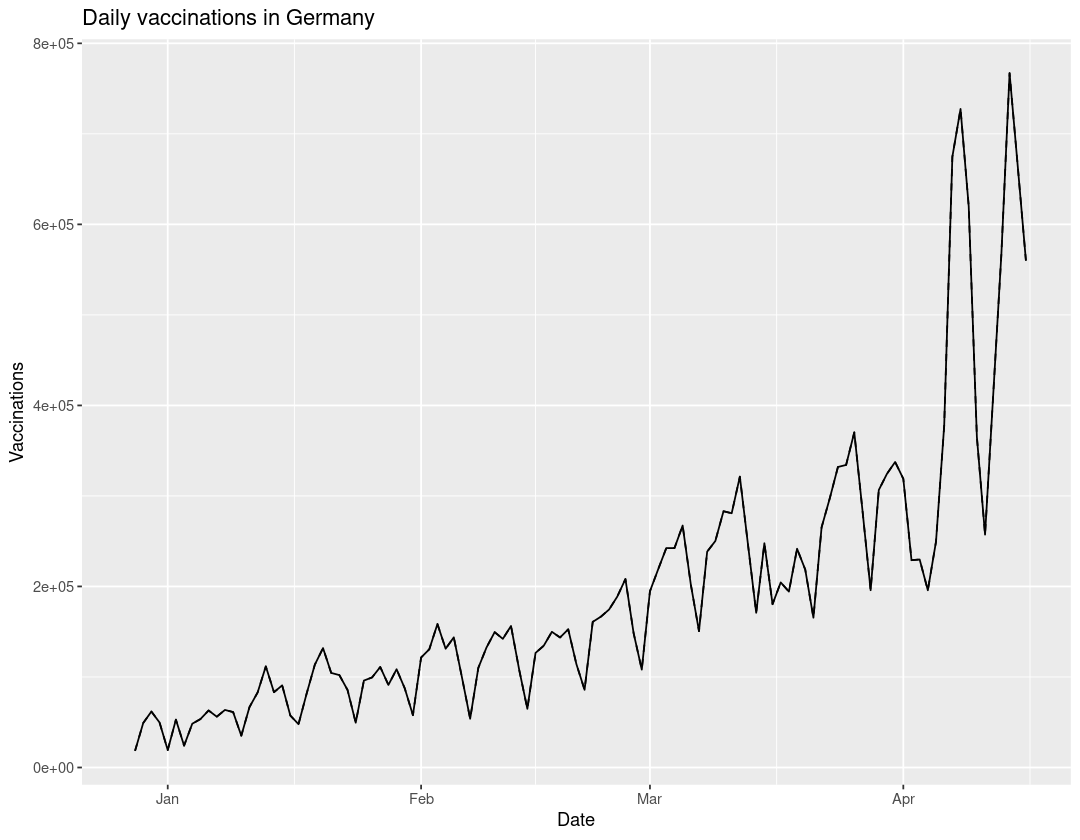

In [62]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg_ger, aes ( x = Group.1, y = daily)) + geom_line(na.rm=TRUE) +
    labs(x="Date",y="Vaccinations", title = "Daily vaccinations in Germany") +
    geom_line(linetype = "dashed", na.rm=TRUE) 

### USA

In [64]:
data_usa = filter(data_covid, location == "United States")

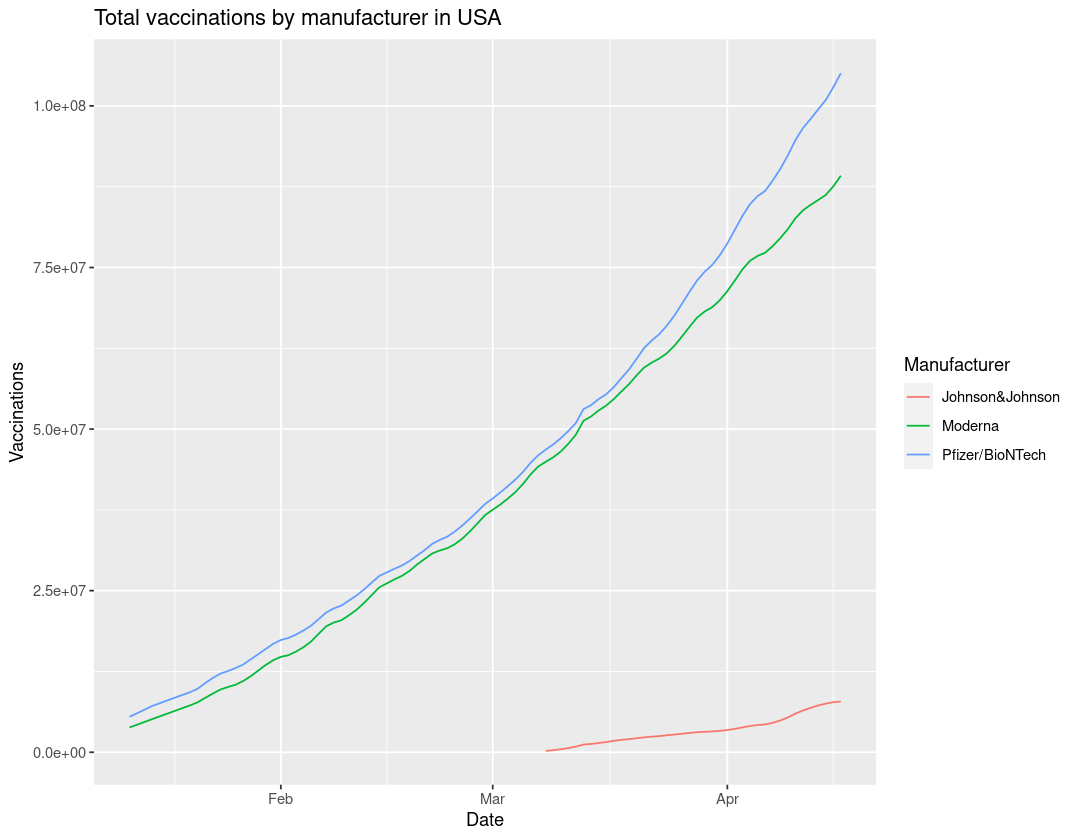

In [65]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_usa, aes ( x = date, y = total_vaccinations, group = vaccine, colour = vaccine)) +
    geom_line() +
    labs( x ="Date", y="Vaccinations", title="Total vaccinations by manufacturer in USA", color = "Manufacturer")

In [66]:
data_agg_usa = aggregate(data_usa$total_vaccinations, by= list(data_usa$date), FUN = sum)
data_agg_usa = mutate(data_agg_usa, daily=c(NA,data_agg_usa$x[2:length(data_agg_usa$x)]-data_agg_usa$x[1:length(data_agg_usa$x)-1]))

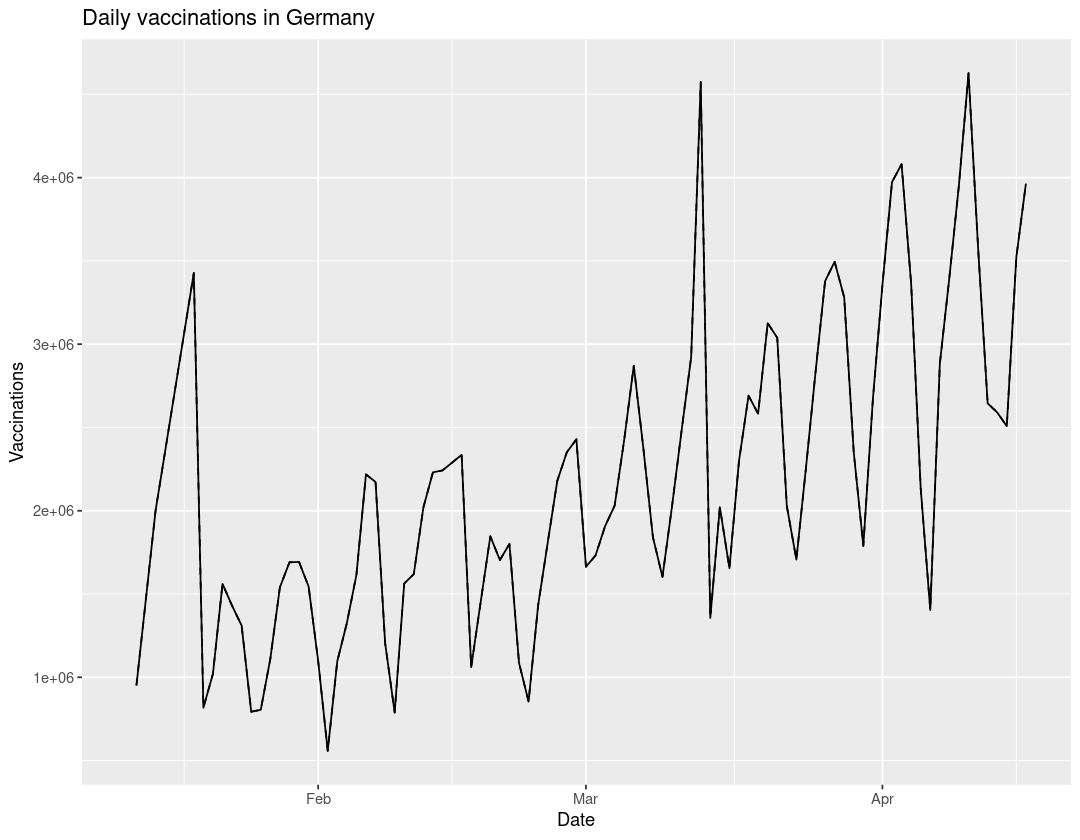

In [67]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot (data_agg_usa, aes ( x = Group.1, y = daily)) + geom_line(na.rm=TRUE) +
    labs(x="Date",y="Vaccinations", title = "Daily vaccinations in Germany") +
    geom_line(linetype = "dashed", na.rm=TRUE) 

### EU Countries 

In [71]:
covid_data2 = tibble(read_csv("https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  location = col_character(),
  iso_code = col_character(),
  date = col_date(format = ""),
  total_vaccinations = col_double(),
  people_vaccinated = col_double(),
  people_fully_vaccinated = col_double(),
  daily_vaccinations_raw = col_double(),
  daily_vaccinations = col_double(),
  total_vaccinations_per_hundred = col_double(),
  people_vaccinated_per_hundred = col_double(),
  people_fully_vaccinated_per_hundred = col_double(),
  daily_vaccinations_per_million = col_double()
)




By selecting the list of european countries, the final plot can be produced using ggplot.

In [72]:
eu_countries = c("Austria", "Belgium", "Bulgaria", "Croatia", "Republic of Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy",
                 "Latvia", "Lithuania", "Luxembourg", "Malta", "Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden")

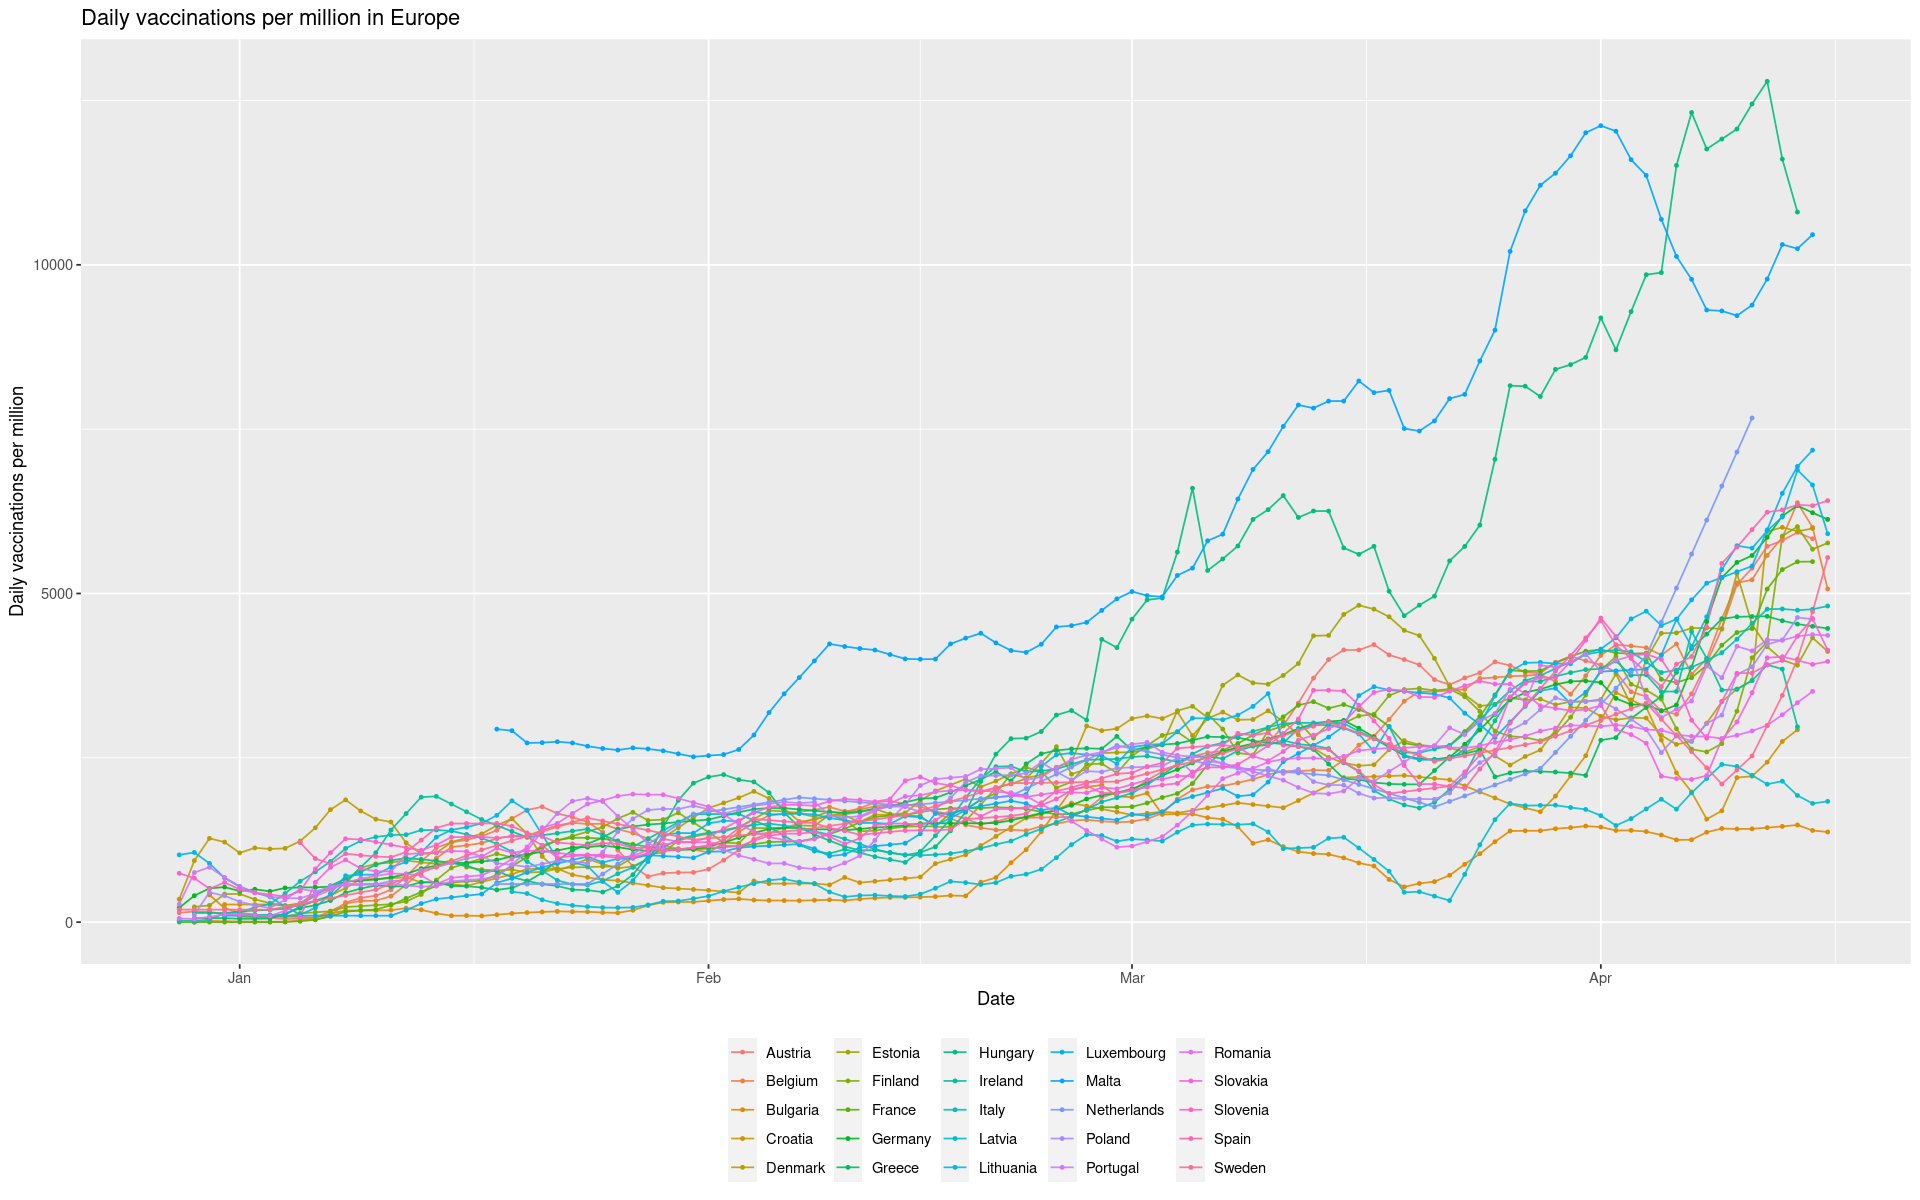

In [75]:
options(repr.plot.width=16, repr.plot.height=10)
ggplot ( subset(covid_data2,location %in% eu_countries)) + 
    aes ( x = date, y = daily_vaccinations_per_million, group = location, colour = location) + 
    geom_line( alpha = 0.9, na.rm = TRUE) +
    geom_point( shape = 19, size = 0.7, na.rm = TRUE) +
    xlab("Date") + 
    ylab("Daily vaccinations per million") + 
    labs(color = "", title = "Daily vaccinations per million in Europe")+
    
    theme(legend.position="bottom")


## Additional plots

By plotting the number of people vaccinate and fully vaccinated in italy or othere countries, is possible to see if there is a strategy on how to vaccinate people.

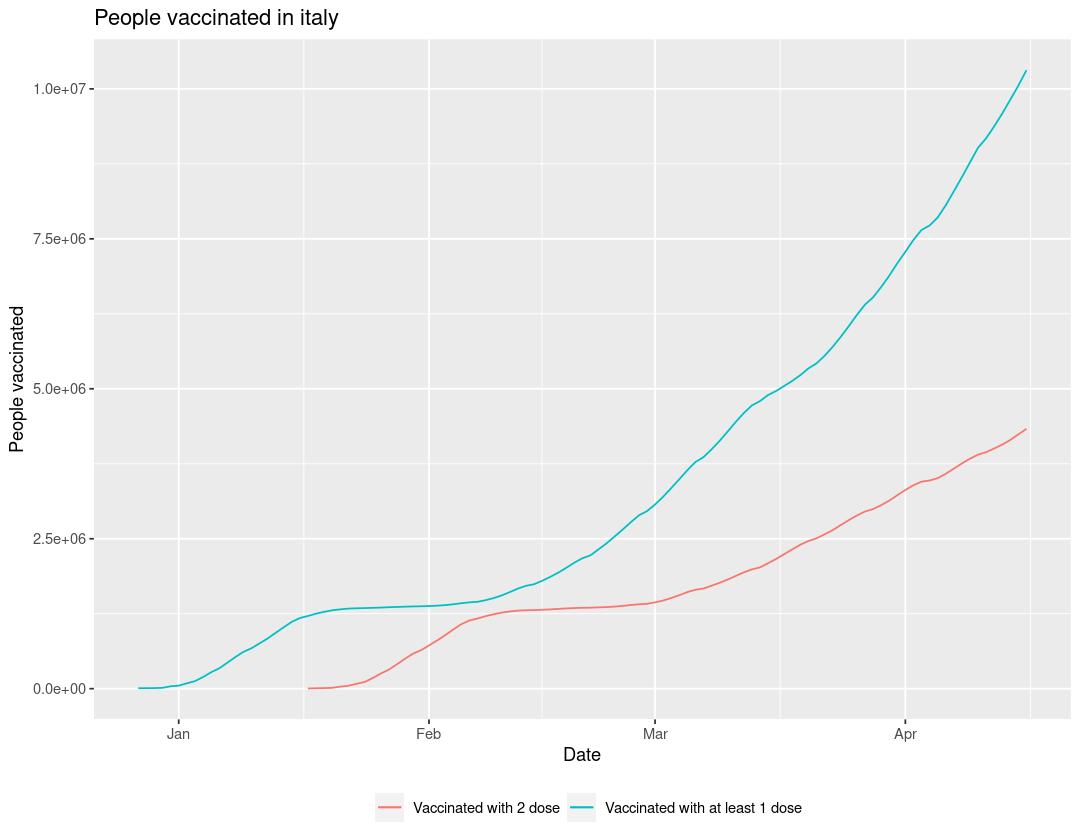

In [77]:
options(repr.plot.width=9, repr.plot.height=7)

ggplot() + 
    geom_line(data = filter(covid_data2, location == "Italy"), aes(x = date, y = people_vaccinated, color = "Vaccinated with at least 1 dose"), na.rm = TRUE) +
    geom_line(data = filter(covid_data2, location == "Italy"), aes(x = date, y = people_fully_vaccinated, color = "Vaccinated with 2 dose"), na.rm = TRUE) +
    theme(legend.position="bottom") +
    labs( x="Date", y= "People vaccinated", color = "", title = "People vaccinated in italy")

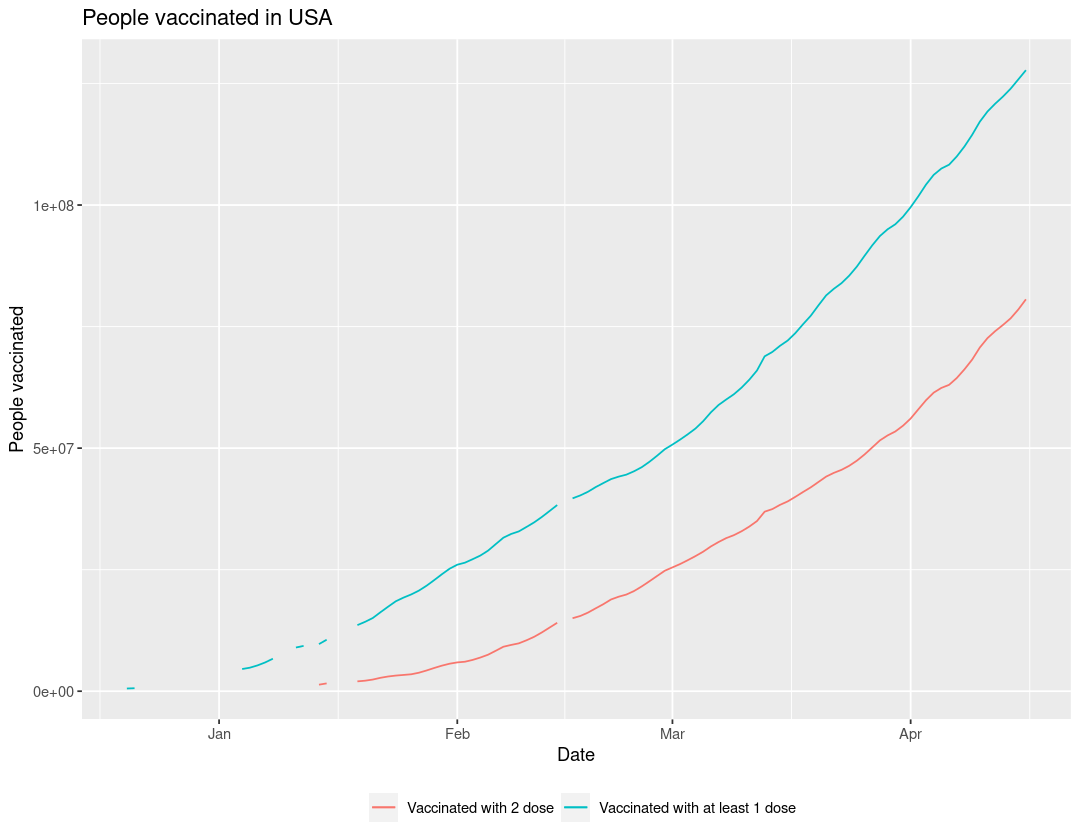

In [78]:
options(repr.plot.width=9, repr.plot.height=7)
ggplot() + 
    geom_line(data = filter(covid_data2, location == "United States"), aes(x = date, y = people_vaccinated, color = "Vaccinated with at least 1 dose"),na.rm = TRUE) +
    geom_line(data = filter(covid_data2, location == "United States"), aes(x = date, y = people_fully_vaccinated, color = "Vaccinated with 2 dose"), na.rm = TRUE) +
    theme(legend.position="bottom") +
    labs( x="Date", y= "People vaccinated", color = "", title = "People vaccinated in USA")

The difference between the two quantities is much larger in Italy, in comparison with the USA one. This is probably due to the italian policy to vaccinate how much people as possible rather than having a lot of people fully vaccinated.